In [1]:
pwd

'C:\\Users\\BVS Rohith'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data=pd.read_csv('train_ctrUa4K.csv')
test_data=pd.read_csv('test_lAUu6dG.csv')
#submi = pd.read_csv('sample_submission_49d68Cx')

# understanding the dataset

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_data.shape


(614, 13)

In [7]:
test_data.shape

(367, 12)

In [8]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariant analysis

In [10]:
cat_var=['Gender','Married','Self_Employed','Credit_History']


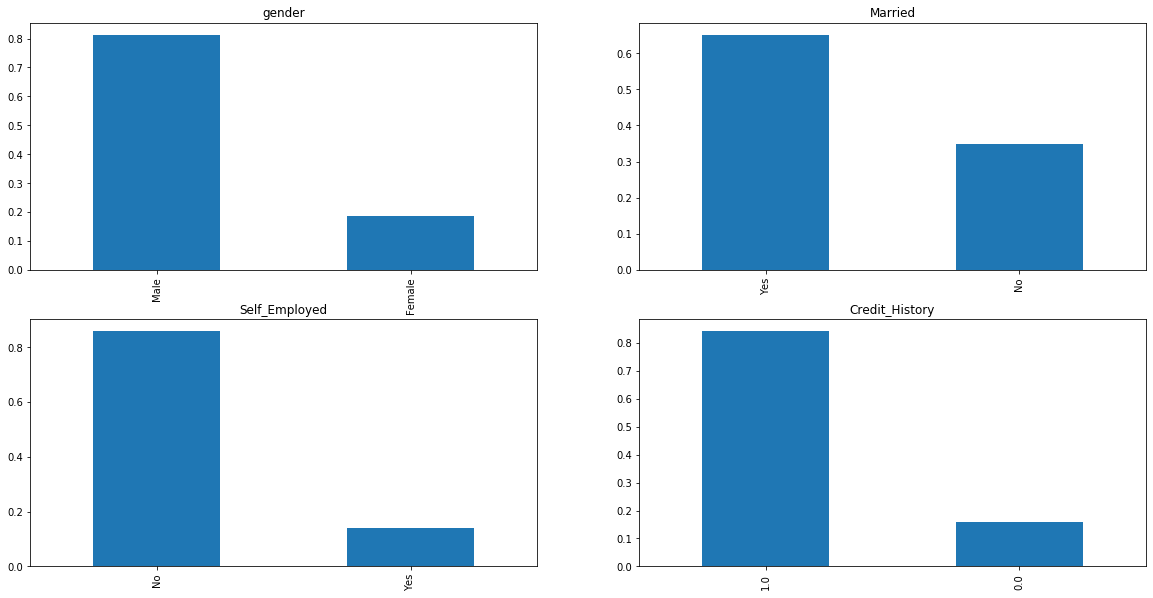

In [11]:
plt.figure(1)
plt.subplot(2,2,1)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='gender')
plt.subplot(2,2,2)
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(2,2,4)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

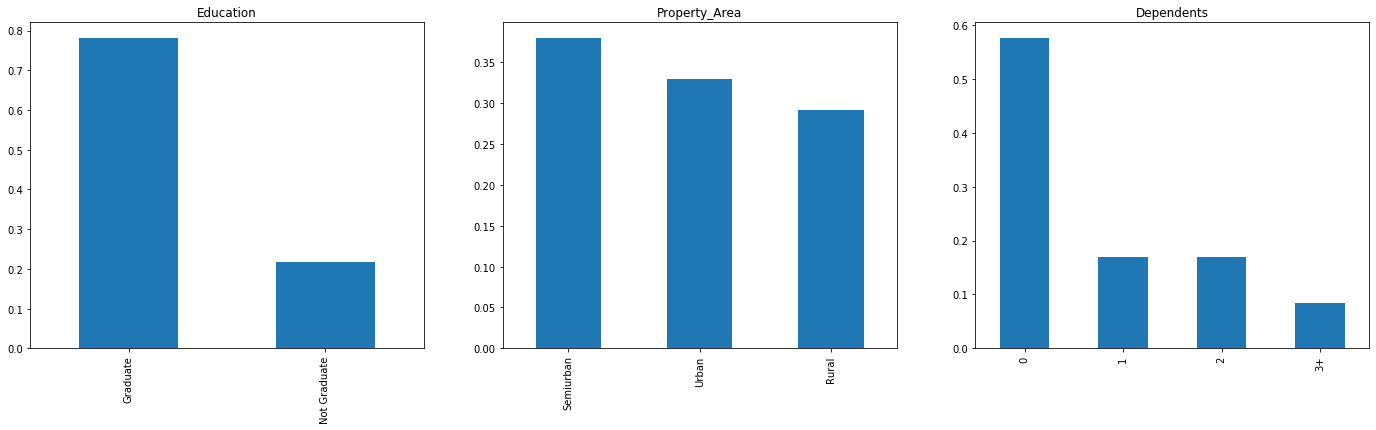

In [12]:
plt.figure(1)
plt.subplot(1,3,1)
train_data['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(1,3,2)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.subplot(1,3,3)
train_data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

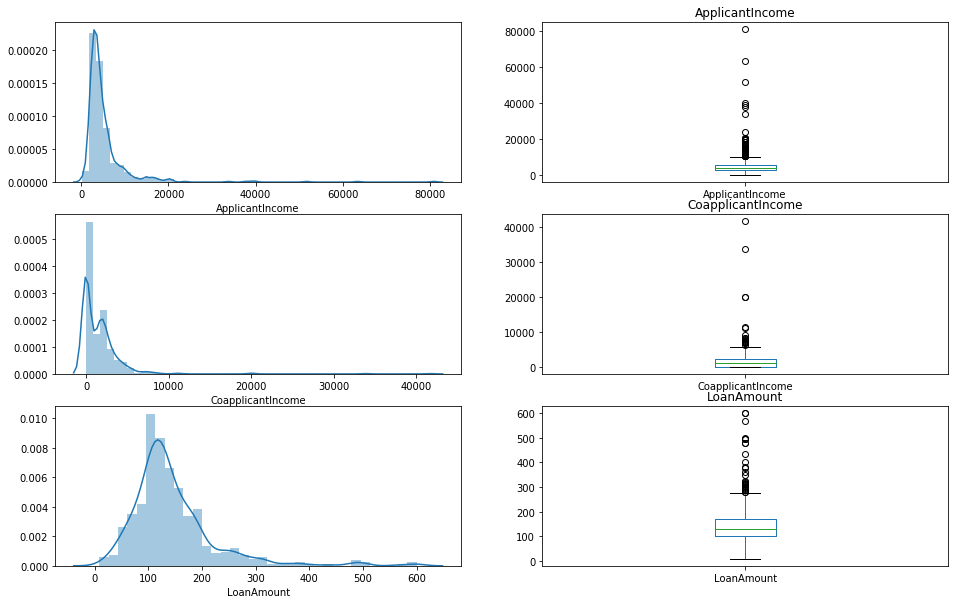

In [13]:
plt.figure(1)
plt.subplot(3,2,1)
sns.distplot(train_data['ApplicantIncome'])
plt.subplot(3,2,2)
train_data['ApplicantIncome'].plot.box(figsize=(16,10),title='ApplicantIncome')
plt.subplot(3,2,3)
sns.distplot(train_data['CoapplicantIncome'])
plt.subplot(3,2,4)
train_data['CoapplicantIncome'].plot.box(title='CoapplicantIncome')
plt.subplot(3,2,5)
df=train_data.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(3,2,6)
df['LoanAmount'].plot.box(title='LoanAmount')
plt.show()

# Bivariant Analysis

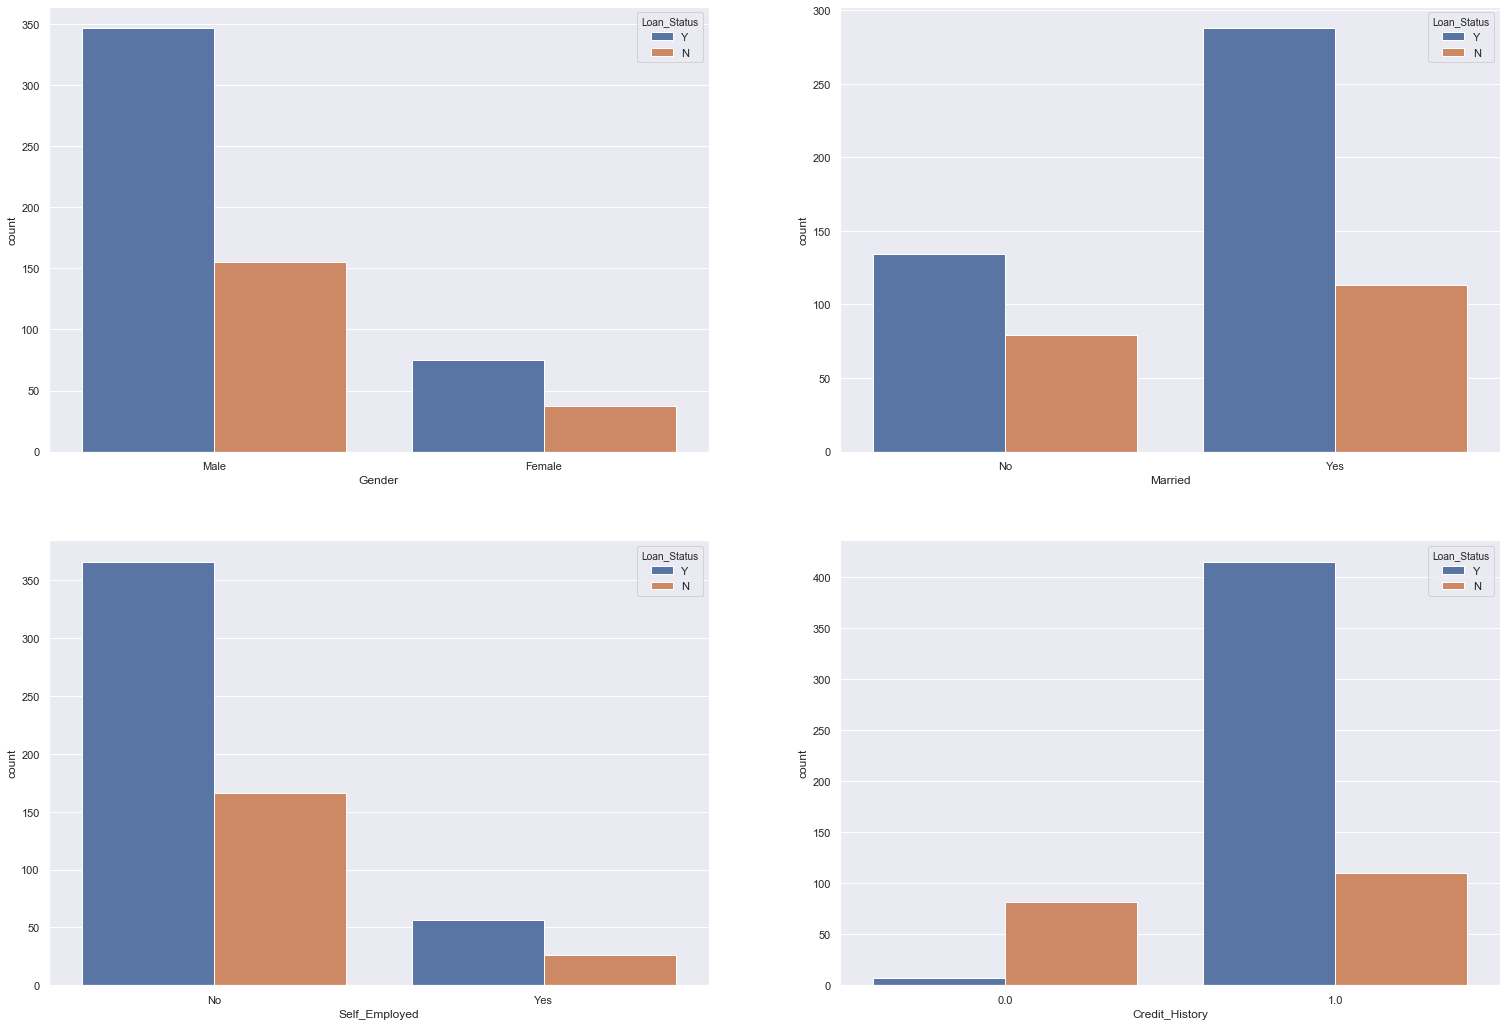

In [100]:
plt.figure(1)
sns.set(rc={'figure.figsize':(16,8)})
#sns.set_context("paper", rc={"font.size":48,"axes.titlesize":8,"axes.labelsize":5})
plt.subplot(2,2,1)
sns.countplot(x='Gender',hue='Loan_Status',data=train_data)
plt.subplot(2,2,2)
sns.countplot(x='Married',hue='Loan_Status',data=train_data)
plt.subplot(2,2,3)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=train_data)
plt.subplot(2,2,4)
sns.countplot(x='Credit_History',hue='Loan_Status',data=train_data)
plt.show()

# Missing Values And Outliers

In [15]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [17]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [18]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)

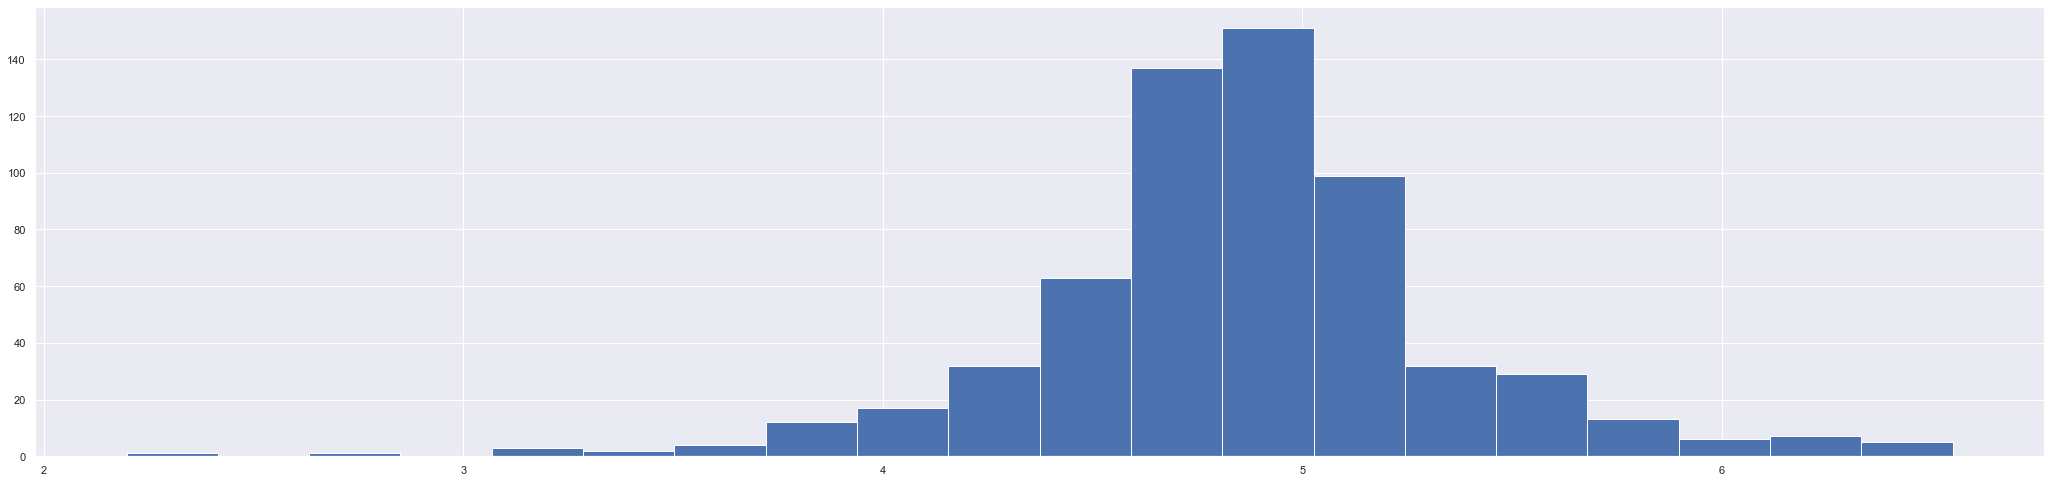

In [19]:
train_data['LoanAmount_log']=np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)
#train_data['LoanAmount'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

# Feature Engineering

In [23]:
train_data['total_income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['total_income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']

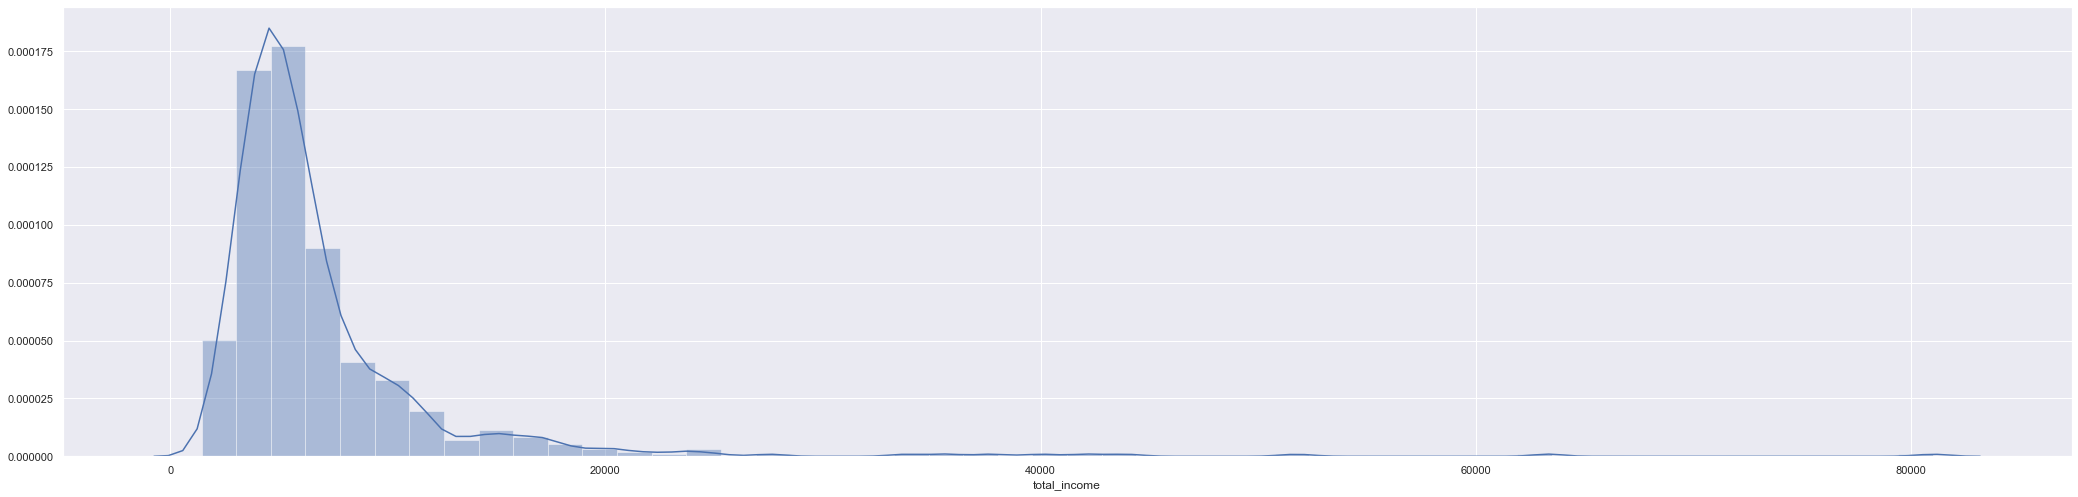

In [24]:
sns.distplot(train_data['total_income'])

In [25]:
train_data['total_income_log']=np.log(train_data['total_income'])
test_data['total_income_log']=np.log(test_data['total_income'])

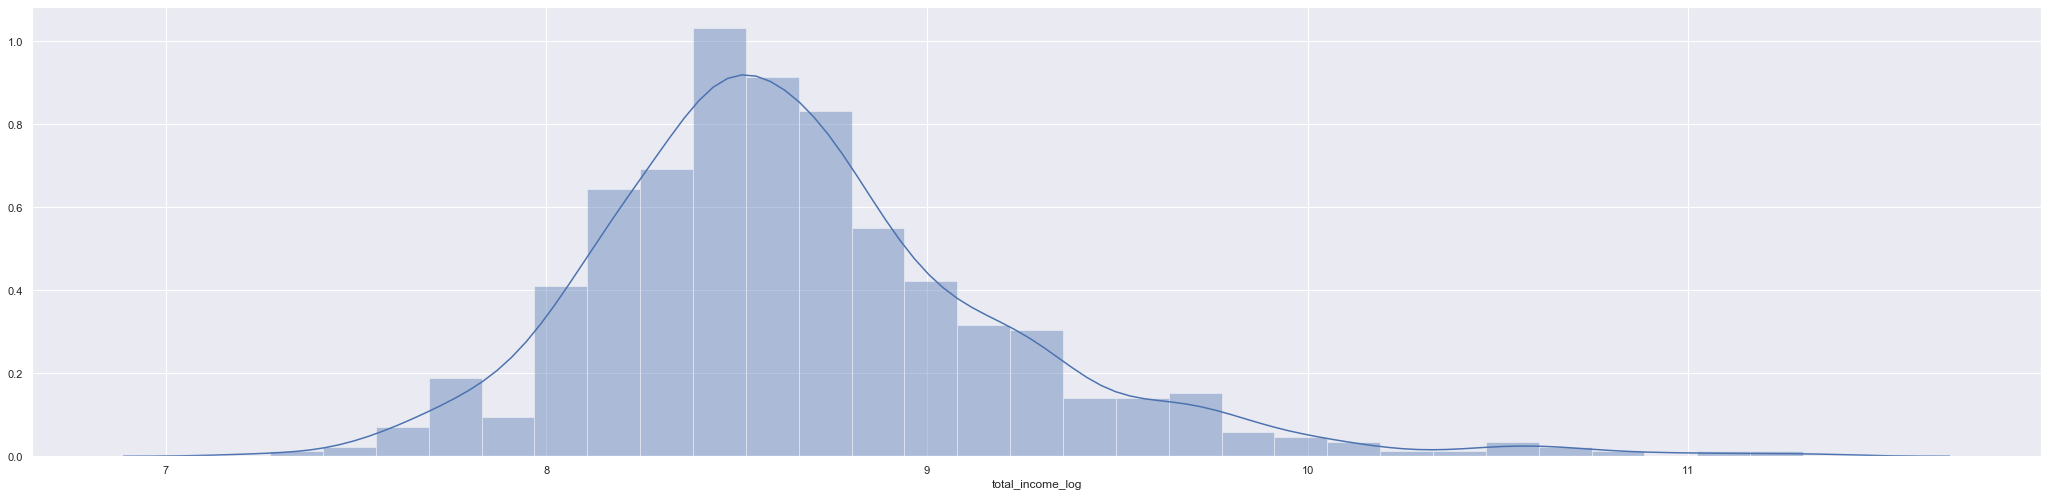

In [26]:
sns.distplot(train_data['total_income_log'])

In [27]:
train_data['EMI']=train_data['LoanAmount']/train_data['Loan_Amount_Term']
test_data['EMI']=test_data['LoanAmount']/test_data['Loan_Amount_Term']

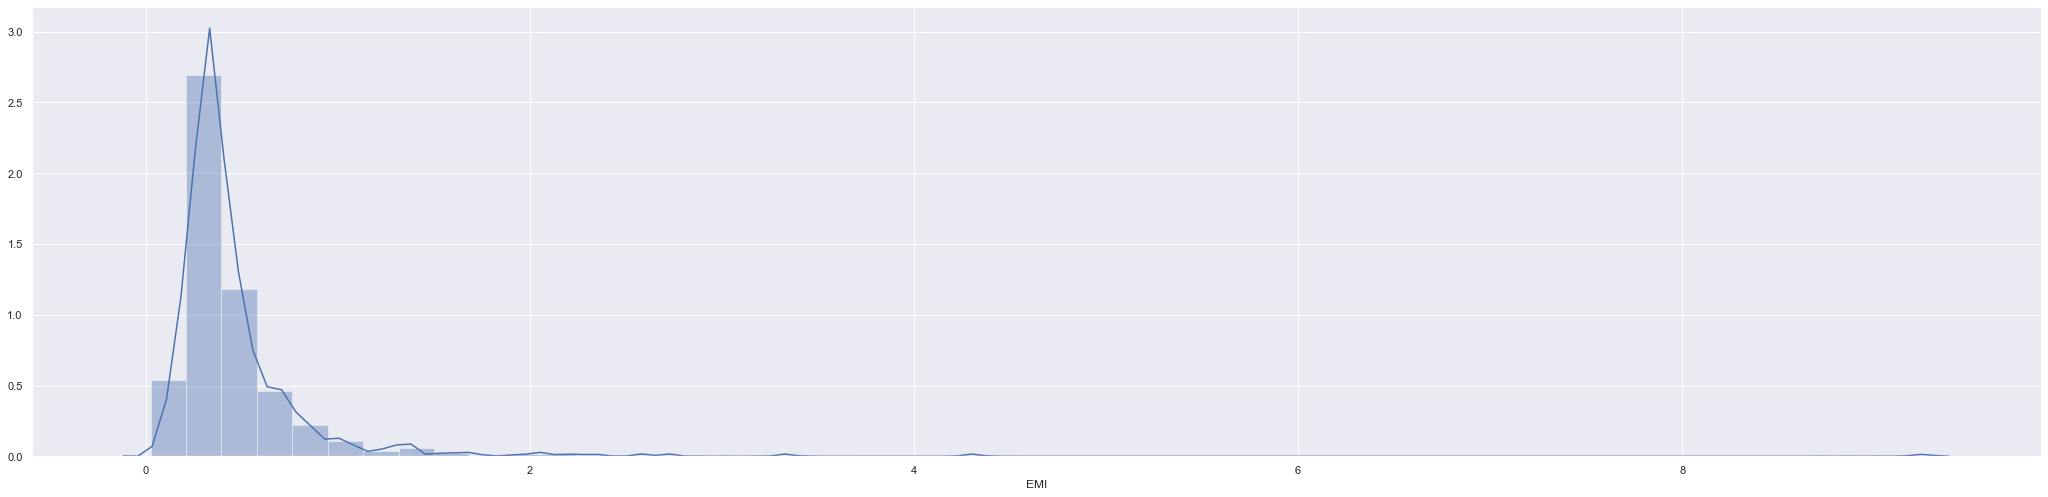

In [28]:
sns.distplot(train_data['EMI'])

In [48]:
train_data=train_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis='columns')
test_data=test_data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis='columns')

# Categorical Encoding

In [49]:
train_data.shape

(614, 13)

In [50]:
x=train_data.drop(['Loan_Status','Loan_ID'],axis=1)
y=train_data['Loan_Status']
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,total_income,total_income_log,EMI
0,Male,No,0,Graduate,No,1.0,Urban,4.852030,5849.0,8.674026,0.355556
1,Male,Yes,1,Graduate,No,1.0,Rural,4.852030,6091.0,8.714568,0.355556
2,Male,Yes,0,Graduate,Yes,1.0,Urban,4.189655,3000.0,8.006368,0.183333
3,Male,Yes,0,Not Graduate,No,1.0,Urban,4.787492,4941.0,8.505323,0.333333
4,Male,No,0,Graduate,No,1.0,Urban,4.948760,6000.0,8.699515,0.391667


In [51]:
x=pd.get_dummies(x)
#y=pd.get_dummies(y)

# model building

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25)
y_train

494    N
287    Y
350    Y
127    Y
396    N
      ..
301    Y
408    N
141    Y
235    Y
90     Y
Name: Loan_Status, Length: 460, dtype: object

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_valid)
accuracy_score(y_valid,pred)

C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8376623376623377

In [54]:

test_data2=test_data.drop('Loan_ID',axis=1)
test=pd.get_dummies(test_data2)
#pred_test=model.predict(test)
test.head()

,Credit_History,LoanAmount_log,total_income,total_income_log,EMI,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.700480,5720,8.651724,0.305556,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1.0,4.836282,4576,8.428581,0.350000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,1.0,5.337538,6800,8.824678,0.577778,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,1.0,4.605170,4886,8.494129,0.277778,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,1.0,4.356709,3276,8.094378,0.216667,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [55]:
from sklearn.model_selection import StratifiedKFold

accur=[] 
str = StratifiedKFold(random_state=1,n_splits=5,shuffle=True)
for train_index,test_index in str.split(x,y):
    x_train,x_test = x.loc[train_index],x.loc[test_index]
    y_train,y_test = y.loc[train_index],y.loc[test_index]
    
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    ac=accuracy_score(y_test,pred)
    accur.append(ac)
    

accur    

C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[0.8064516129032258,
 0.8064516129032258,
 0.8032786885245902,
 0.7950819672131147,
 0.8360655737704918]

In [56]:
np.array(accur).mean()

0.8094658910629298

In [79]:
from sklearn.model_selection import GridSearchCV
import xgboost

In [58]:
params = {
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [59]:
model_2 = xgboost.XGBClassifier()

In [85]:
grid_search = GridSearchCV(estimator=model_2,param_grid=params,n_jobs=-1,cv=5,scoring='accuracy')

In [86]:
grid_search.fit(x,y)

[18:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\BVS Rohith\Anaconda31\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\BVS Rohith\Anaconda31\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                

In [87]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [89]:
model_2m = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [90]:
accur2=[] 
str = StratifiedKFold(random_state=1,n_splits=5,shuffle=True)
for train_index,test_index in str.split(x,y):
    x_train,x_test = x.loc[train_index],x.loc[test_index]
    y_train,y_test = y.loc[train_index],y.loc[test_index]
    
    model_2m.fit(x_train,y_train)
    pred_2=model_2m.predict(x_test)
    ac=accuracy_score(y_test,pred_2)
    accur2.append(ac)
    

accur2  

C:\Users\BVS Rohith\Anaconda31\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[0.7983870967741935,
 0.782258064516129,
 0.7622950819672131,
 0.7622950819672131,
 0.819672131147541]

In [91]:
np.array(accur2).mean()



0.7849814912744579

In [74]:
pred_2m=model_2m.predict(test)
pred = model.predict(test)

In [75]:
submi = pd.read_csv('sample_submission_49d68Cx.csv')
submi['Loan_Status']=pred
submi['Loan_ID']=test_data['Loan_ID']

In [76]:
submi['Loan_Status'].replace(0,'N',inplace=True)
submi['Loan_Status'].replace(1,'Y',inplace=True)

In [77]:
pd.DataFrame(submi,columns=['Loan_ID','Loan_Status']).to_csv('logistic2.csv')